In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [2]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [3]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

In [9]:
events=joblib.load("events_example.joblib")
events[17][:10]


[Hit(x=433.245657134451, y=9894.0, z=9119.25, t=44.24403418490743, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=0),
 Hit(x=412.25, y=9975.599999999999, z=9094.674411664088, t=44.93046413509348, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=1),
 Hit(x=398.8345227197383, y=10057.2, z=9078.75, t=50.54646826931014, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=2),
 Hit(x=403.25, y=10138.8, z=9091.28217542627, t=52.408554464996804, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=5, ind=3)]

In [13]:
hits = events[61]

tf = TF.TrackFinder(method="greedy", debug=True)
tf.parameters["cut_track_HitAddChi2"]=12
tf.parameters["cut_track_HitDropChi2"]=8
tf.parameters["cut_track_HitProjectionSigma"]=10
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["fit_track_MultipleScattering"]=False


hits_grouped = Util.track.group_hits_by_layer(hits)
hits_found,chi2_found = tf.find_once(hits, hits_grouped, [2,4,12])
hits_found,chi2_found


  Hit found: Hit(x=1641.0968136352628, y=10057.2, z=10290.25, t=69.24390621664867, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=2) ; chi2 0.0
  Hit found: Hit(x=1596.75, y=9975.599999999999, z=10218.620521108247, t=62.68968674712015, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=1) ; chi2 12.818211787855434
  Hit found: Hit(x=1510.5383022581007, y=9894.0, z=10186.75, t=60.10378126145207, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=0) ; chi2 61.36714301202927
  No hits added from layer 4. Chi2 of hits [12.21243168724885]. Hits [[1.64109681e+03 1.00572000e+04 1.02902500e+04 6.92439062e+01
  1.34167899e+01 2.88675135e-01 1.29903811e+00 7.07106781e-01
  4.00000000e+00 2.00000000e+00]]
  Hit found: Hit(x=1731.75, y=10138.8, z=10347.392140245827, t=71.50862421924055, x_err=1.2990381

([Hit(x=1510.5383022581007, y=9894.0, z=10186.75, t=60.10378126145207, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=0),
  Hit(x=1596.75, y=9975.599999999999, z=10218.620521108247, t=62.68968674712015, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=1),
  Hit(x=1731.75, y=10138.8, z=10347.392140245827, t=71.50862421924055, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=5, ind=3)],
 6.140887024706712)

In [17]:
reload(TF)

<module 'trackfinder' from '../tracker\\trackfinder.py'>

In [20]:
# tf = TF.TrackFinder(method="recursive", debug=False)
tf = TF.TrackFinder(method="greedy", debug=True)
tf.parameters["cut_track_HitAddChi2"]=13
tf.parameters["cut_track_HitDropChi2"]=10
tf.parameters["cut_track_HitProjectionSigma"]=10
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["fit_track_MultipleScattering"]=False
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
print(len(tracks))
# joblib.dump(tracks, "tracks_example.joblib")
    

--- New seed --- 
  seed: [0, 3, 0.2895234940833001]
  Hit found: Hit(x=1641.0968136352628, y=10057.2, z=10290.25, t=69.24390621664867, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=2) ; chi2 4.620060905910924
  Hit found: Hit(x=1596.75, y=9975.599999999999, z=10218.620521108247, t=62.68968674712015, x_err=1.299038105676658, y_err=0.2886751345948129, z_err=13.416789873441976, t_err=0.7071067811865475, layer=3, ind=1) ; chi2 9.44185744992799
  Hit found: Hit(x=1510.5383022581007, y=9894.0, z=10186.75, t=60.10378126145207, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=2, ind=0) ; chi2 1.9285564967078013
  Hit found: Hit(x=1641.0968136352628, y=10057.2, z=10290.25, t=69.24390621664867, x_err=13.416789873441976, y_err=0.2886751345948129, z_err=1.299038105676658, t_err=0.7071067811865475, layer=4, ind=2) ; chi2 12.21243168724885
  Hit found: Hit(x=1731.75, y=1

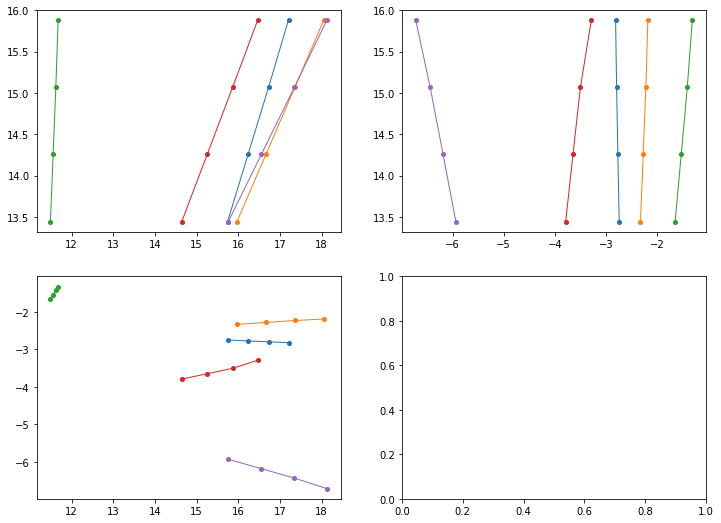

In [185]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label=track_label)

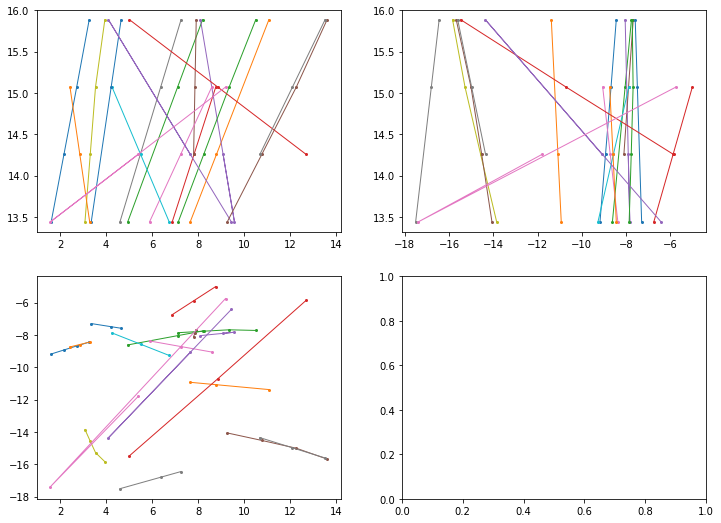

In [13]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)